## Predicting Heart Disease with Classification Machine Learning Algorithms

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

In [473]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let's look at the descriptions of different features:
1. age (#)
2. sex : 1= Male, 0= Female (Binary)
3. (cp)chest pain type (4 values -Ordinal):Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic
4. (trestbps) resting blood pressure (#)
5. (chol) serum cholesterol in mg/dl (#)
6. (fbs)fasting blood sugar > 120 mg/dl(Binary)(1 = true; 0 = false)
7. (restecg) resting electrocardiography results(values 0,1,2)
8. (thalach) maximum heart rate achieved (#)
9. (exang) exercise induced angina (binary) (1 = yes; 0 = no)
10. (oldpeak) = ST depression induced by exercise relative to rest (#)
11. (slope) of the peak exercise ST segment (Ordinal) (Value 1: up sloping , Value 2: flat , Value 3: down sloping )
12. (ca) number of major vessels (0–3, Ordinal) colored by fluoroscopy
13. (thal) maximum heart rate achieved — (Ordinal): 3 = normal; 6 = fixed defect; 7 = reversible defect

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Our data has 3 types of data:
1. Continuous (#): which is quantitative data that can be measured- age, trestbps, chol, thalach, oldpeak
2. Ordinal Data: Categorical data that has a order to it (0,1,2,3, etc)- cp, restecg,  slope, ca, thal
3. Binary Data: data whose unit can take on only two possible states ( 0 &1 )- sex, fbs, exang

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## Numerical Features

### Distribution

Text(0.5, 1.0, 'Age')

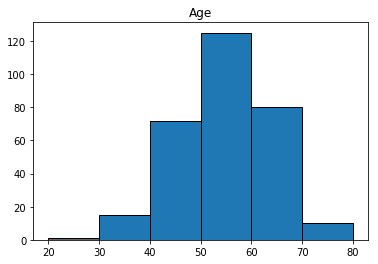

In [5]:
plt.hist(df['age'], bins = [20,30,40,50,60,70,80], edgecolor = 'black')
plt.title('Age')

Text(0.5, 1.0, 'Resting Blood Pressure')

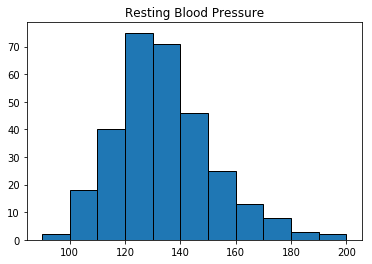

In [6]:
plt.hist(df['trestbps'], bins = [90,100,110,120,130,140,150,160,170,180,190,200], edgecolor = 'black')
plt.title('Resting Blood Pressure')

Text(0.5, 1.0, 'Cholesterol')

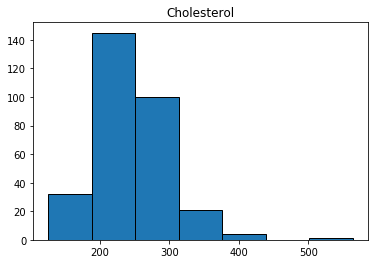

In [7]:
plt.hist(df['chol'], bins = 7, edgecolor = 'black')
plt.title('Cholesterol')

Text(0.5, 1.0, 'Max Heart Rate')

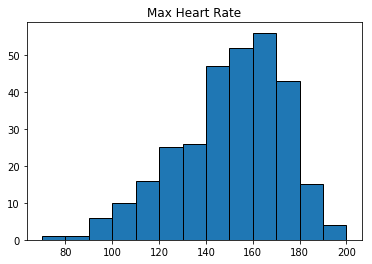

In [8]:
plt.hist(df['thalach'], bins = [70,80,90,100,110,120,130,140,150,160,170,180,190,200], edgecolor = 'black')
plt.title('Max Heart Rate')

Text(0.5, 1.0, 'ST Depression')

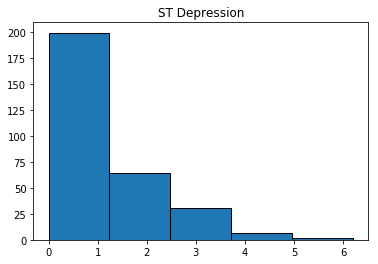

In [9]:
plt.hist(df['oldpeak'], bins = 5, edgecolor = 'black')
plt.title('ST Depression')

### Relationship between different numerical features

Text(0.5, 1.0, 'Age vs RBP')

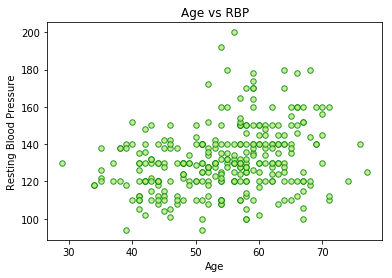

In [10]:
plt.scatter(df['age'],df['trestbps'], s=30, c = '#b6eb7a', edgecolor = 'green', linewidth = 1, alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.title('Age vs RBP')

Text(0.5, 1.0, 'Age vs Cholesterol')

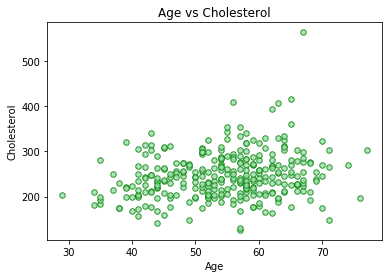

In [11]:
plt.scatter(df['age'],df['chol'], s=30, c = '#9bdeac', edgecolor = 'green', linewidth = 1, alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs Cholesterol')

Text(0.5, 1.0, 'Age vs Max Heart Rate')

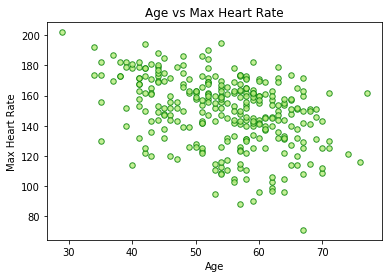

In [12]:
plt.scatter(df['age'],df['thalach'], s=30, c = '#b6eb7a', edgecolor = 'green', linewidth = 1, alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('Age vs Max Heart Rate')

Text(0.5, 1.0, 'Age vs ST depsression')

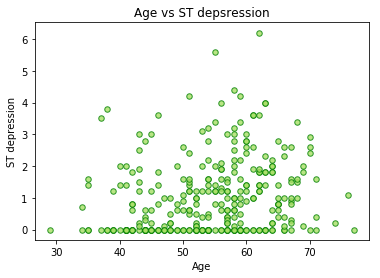

In [13]:
plt.scatter(df['age'],df['oldpeak'], s=30, c = '#a8df65', edgecolor = 'green', linewidth = 1, alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.title('Age vs ST depsression')

There doesn't seem to be much relationship between Age and other numerical features

#### KDE Plots

C:\Users\aruni\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


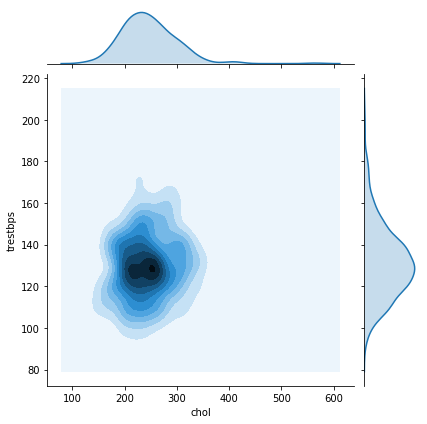

In [14]:
sns.jointplot(x=df['chol'], y=df['trestbps'], data=df, kind="kde")

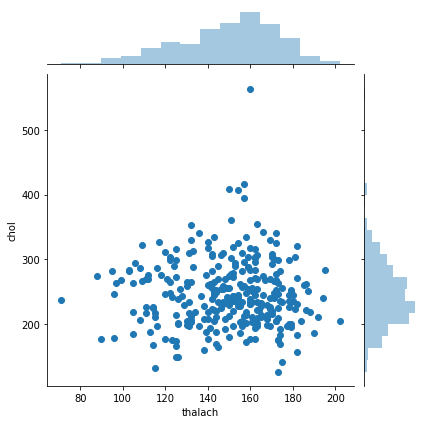

In [15]:
sns.jointplot(x=df['thalach'], y=df['chol'], data=df)

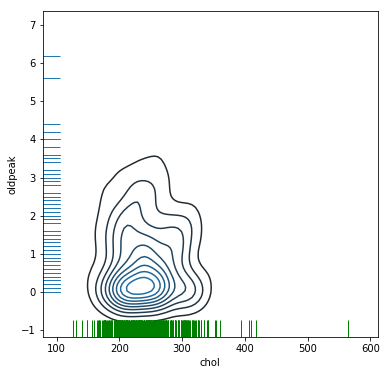

In [16]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df['chol'], df['oldpeak'], ax=ax)
sns.rugplot(df['chol'], color="g", ax=ax)
sns.rugplot(df['oldpeak'], vertical=True, ax=ax);

Text(0.5, 1.0, 'RBP vs Max Heart Rate')

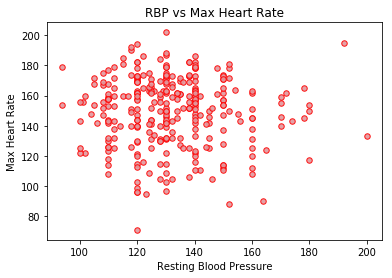

In [17]:
plt.scatter(df['trestbps'],df['thalach'], s=30, c = '#e2979c', edgecolor = 'red', linewidth = 1, alpha = 0.9)
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Max Heart Rate')
plt.title('RBP vs Max Heart Rate')

Text(0.5, 1.0, 'RBP vs ST Depression')

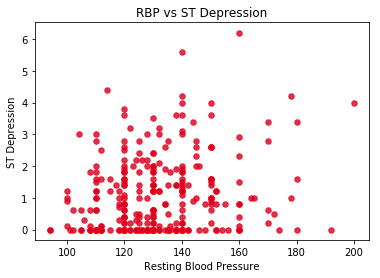

In [18]:
plt.scatter(df['trestbps'],df['oldpeak'], s=30, c = '#c70039', edgecolor = 'red', linewidth = 1, alpha = 0.8)
plt.xlabel('Resting Blood Pressure')
plt.ylabel('ST Depression')
plt.title('RBP vs ST Depression')

Text(0.5, 1.0, 'Max Heart Rate vs ST Depression')

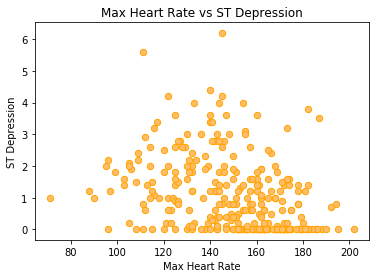

In [19]:
plt.scatter(df['thalach'],df['oldpeak'], s=40, c = '#ffbd69', edgecolor = 'orange', linewidth = 1, alpha = 1)
plt.xlabel('Max Heart Rate')
plt.ylabel('ST Depression')
plt.title('Max Heart Rate vs ST Depression')

Overall, all the features are not similar which is good for our model.

### Analysing numerical features w.r.t Target

In [21]:
X = df[['age','trestbps','chol','thalach','oldpeak']]
y = df['target']

Number of Patients not diagnosed with Heart Disease: 138
Number of Patients diagnosed with Heart Disease: 165


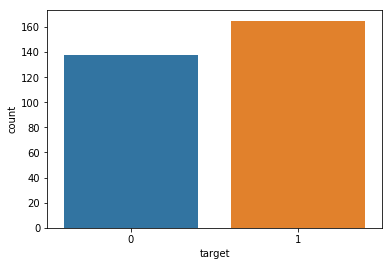

In [22]:
sns.countplot(y)
yes, no = y.value_counts()
print('Number of Patients not diagnosed with Heart Disease:', no)
print('Number of Patients diagnosed with Heart Disease:', yes)

We have a good balance between our output.<br>
Now, let's transform our dataset such that our columns work as identifiers and our target variable is used as value.

In [23]:
data = X
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:,:]], axis=1)
data = pd.melt(data, id_vars = 'target', var_name = 'features',
                value_name = 'value')
data.head()

,target,features,value
0,1,age,0.950624
1,1,age,-1.912150
2,1,age,-1.471723
3,1,age,0.179877
4,1,age,0.289984


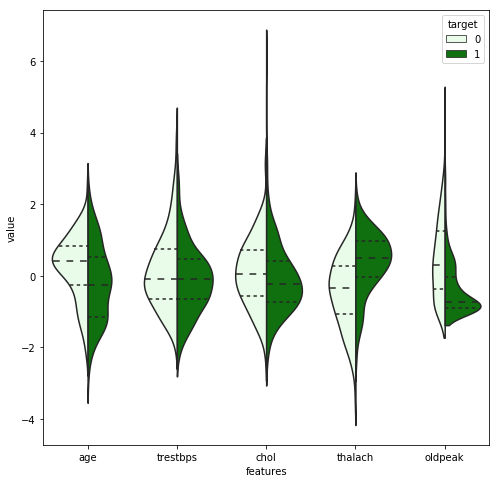

In [24]:
plt.figure(figsize = (8,8))
sns.violinplot(x = 'features', y = 'value', hue = 'target', data = data, split = True, inner = 'quart', color='g')

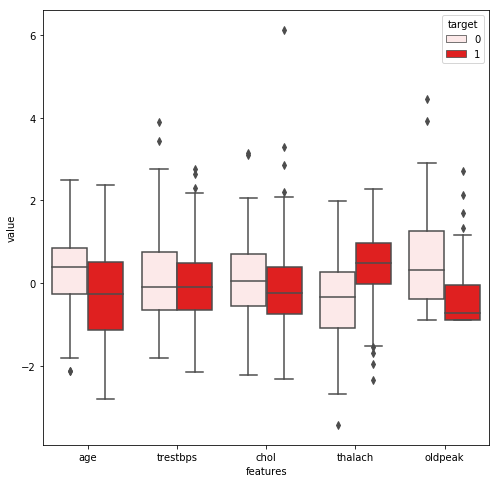

In [25]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'features' , y='value', hue='target', data = data, color = 'r')

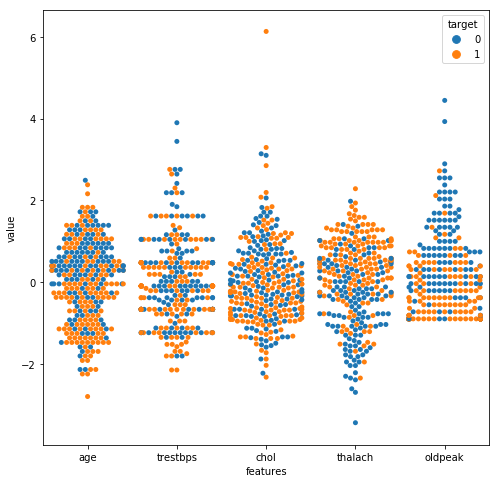

In [26]:
plt.figure(figsize = (8,8))
sns.swarmplot(x = 'features', y = 'value', hue = 'target', data = data)

Thalach and oldpeak and, to some extent even age, are good indicators of the target variable

## Categorical

Number of Female Patients: 96
Number of Male Patients: 207


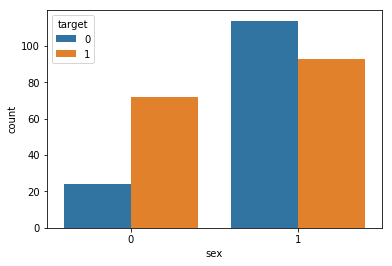

In [27]:
sns.countplot(x="sex", data=df,hue='target')
male, fm = df['sex'].value_counts()
print('Number of Female Patients:', fm)
print('Number of Male Patients:', male)

Females had higher number of patients with heart disease

Fasting Blood Sugar > 120 : 45
Fasting Blood Sugar < 120:  258


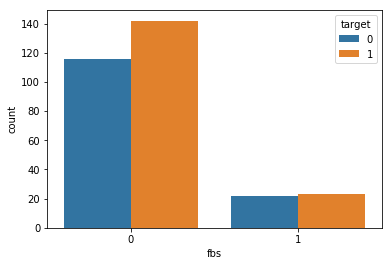

In [28]:
sns.countplot(x="fbs", data=df,hue='target')
fbsno, fbsyes = df['fbs'].value_counts()
print('Fasting Blood Sugar > 120 :', fbsyes)
print('Fasting Blood Sugar < 120: ', fbsno)

Exercise Induced Angina Yes:  99
Exercise Induced Angina No: 204


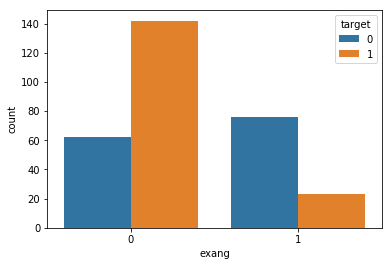

In [29]:
sns.countplot(x="exang", data=df,hue='target')
no, yes = df['exang'].value_counts()
print('Exercise Induced Angina Yes: ', yes)
print('Exercise Induced Angina No:', no)

People with no exercise induced angina have more people with the disease

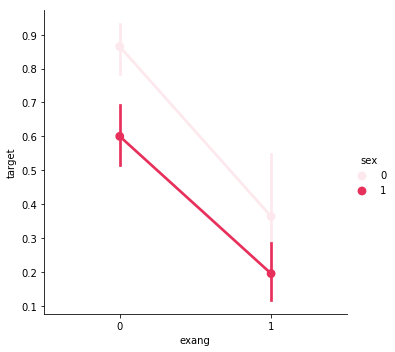

In [30]:
sns.catplot(x='exang',y='target',data=df,kind='point', hue = 'sex', color = '#e7305b')

As previously seen, there are more diseased people with no Exercise Induced Angina plus this also provides a confirmation that Females suffered more from the disease

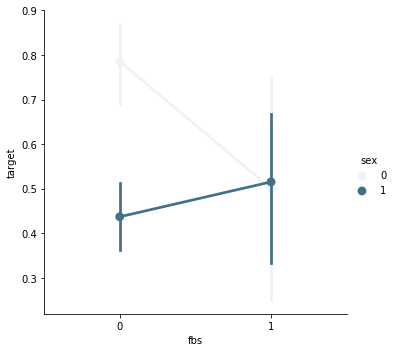

In [31]:
sns.catplot(x='fbs',y='target',data=df,kind='point', hue = 'sex', color = '#436f8a')

There are more disease-free females with FBS < 120 as compared to males in that category

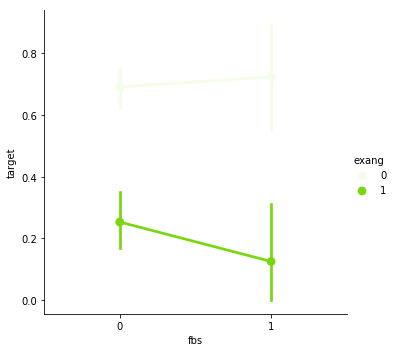

In [32]:
sns.catplot(x='fbs',y='target',data=df,kind='point', hue = 'exang', color = '#79d70f')

Majority of people with heart disease had FBS > 120 and no Exercised Induced Angina.

C:\Users\aruni\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


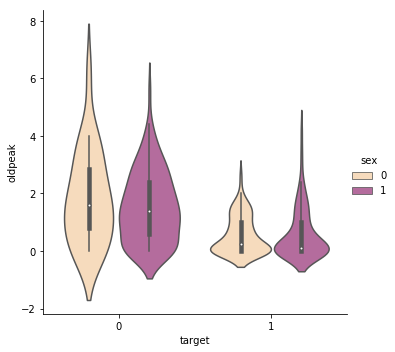

In [76]:
sns.catplot(x = 'target',y='oldpeak',data=df,kind='violin',hue='sex', palette=sns.color_palette(['#ffdcb4', '#c060a1']))

We can see that the overall shape & distribution for negative & positive patients differ vastly. <br>Positive patients exhibit a lower median for ST depression level & thus a great distribution of their data is between 0 & 2, while negative patients are between 1 & 3. In addition, we don’t see many differences between male & female target outcomes.

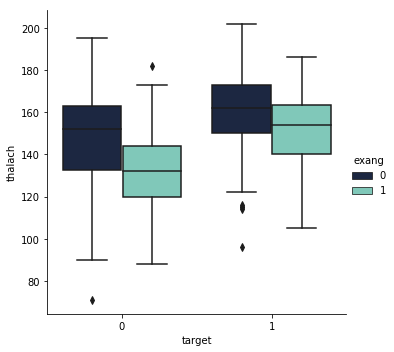

In [94]:
sns.catplot(x = 'target',y='thalach',data=df,kind='box',hue='exang', palette=sns.color_palette(['#162447', '#74d4c0']))

Positive patients exhibit a heightened median for Max Heart Rate, while negative patients have lower levels

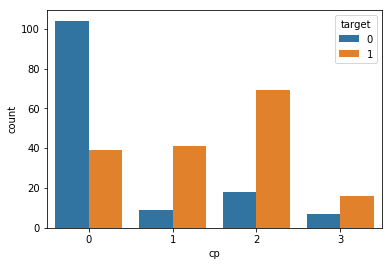

In [36]:
sns.countplot(x="cp", data=df,hue='target')

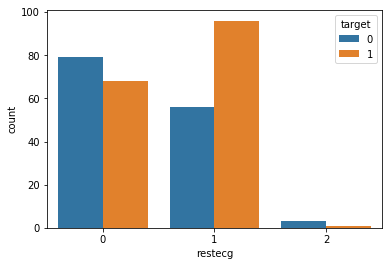

In [37]:
sns.countplot(x="restecg", data=df,hue='target')

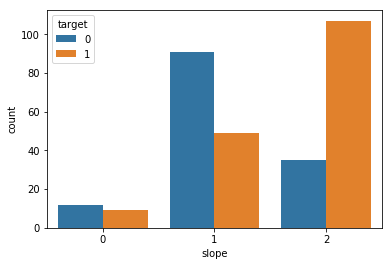

In [38]:
sns.countplot(x="slope", data=df,hue='target')

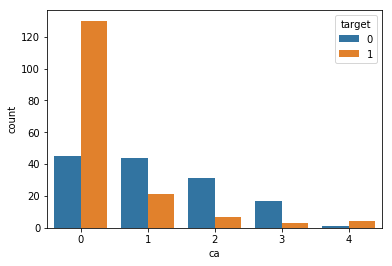

In [39]:
sns.countplot(x="ca", data=df,hue='target')

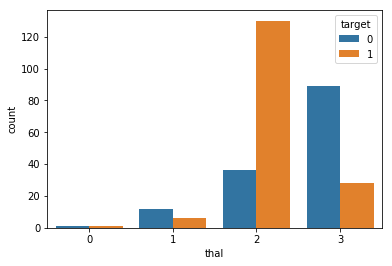

In [40]:
sns.countplot(x="thal", data=df,hue='target')

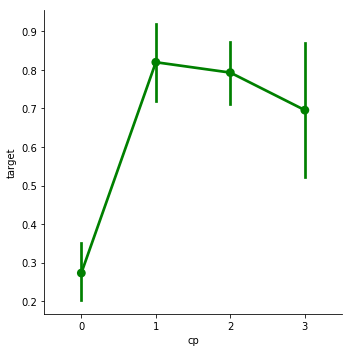

In [89]:
sns.catplot(x='cp',y='target',data=df,kind='point', color = 'g')

Here we see that patients with no or low chest pain(0) very rarely show a tendency to have a disease which makes sense since a greater amount of chest pain will lead to a greater chance of having heart disease.

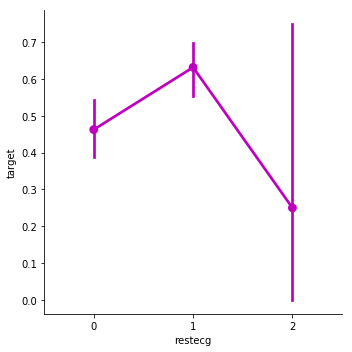

In [90]:
sns.catplot(x='restecg',y='target',data=df,kind='point', color = 'm' )

People with High Resting ECG(~2) show a lesser chance of having the disease.

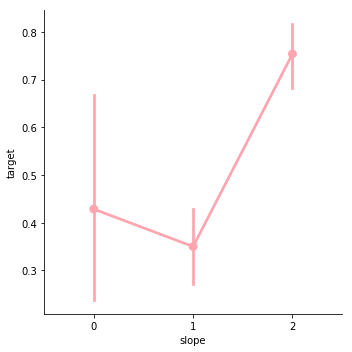

In [91]:
sns.catplot(x='slope',y='target',data=df,kind='point', color = '#ffa5b0')

More number of positive patients had peak exercise ST segment equal to 2

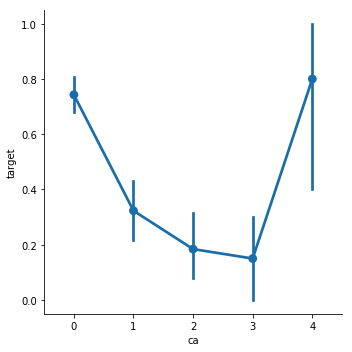

In [92]:
sns.catplot(x='ca',y='target',data=df,kind='point',  color = '#1b6ca8')

### Correlation

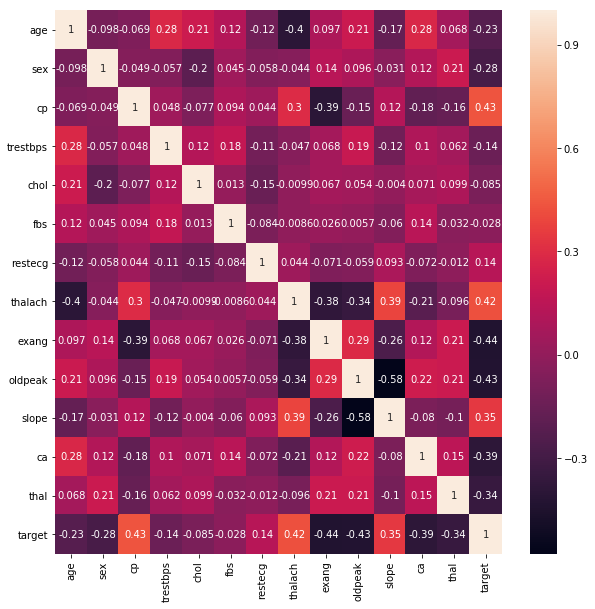

In [427]:
plt.figure( figsize = (10,10))
sns.heatmap(df.corr(), annot = True)

<p>
There is a moderate positive correlation between the target variable and 'cp','thalach' and 'slope'. As a person's chest pain, max. heart rate or peak exercise ST deprssion increases, his chances of getting a heart disease also increase.
</p>
<p>
On the other hand, there is a moderate negative correaltion between the target variable and 'exang'(Exercise Induced Angia),'oldpeak'(ST depression induced by exercise relative to rest),'ca'( number of major vessels ) and 'thal'(max. heart rate achieved).
</p>

### Apply categorical encoding

In [474]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [475]:
df = pd.concat([df, a, b, c], axis = 1)
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


### Feature Engineering and Data Preparation

In [476]:
X = df.drop(columns = ['chol','fbs','age','sex','trestbps','restecg','target'], axis = 1)
y = df['target']

In [477]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)

Training set shape:  (227, 15) (227,)
Testing set shape:  (76, 15) (76,)


In [478]:
# Function definition for fitting data
def model_fit(model,X, y,test):
    model.fit(X,y)
    y_pred = model.predict(test)
    return y_pred

In [479]:
# Function for calculating accuracy
from sklearn.metrics import accuracy_score
def accuracy(Y, y):
    return accuracy_score(Y,y)

In [480]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test = StandardScaler().fit(X_test).transform(X_test.astype(float))

C:\Users\aruni\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\aruni\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [539]:
model_accuracy = {}

### K-Nearest Neighbors

In [482]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [483]:
y_knn = model_fit(knn, X_train, y_train, X_test)
knn_acc = accuracy(y_test, y_knn)

In [484]:
print('Test accuracy: ', knn_acc)

Test accuracy:  0.8289473684210527


In [485]:
x = [0]
mean_acc = np.zeros(20)
mean_acc_train = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    yhat2 = knn.predict(X_train)
    mean_acc[i-1] = accuracy_score(y_test, yhat)
    mean_acc_train[i-1] = accuracy_score(y_train, yhat2)
    x.append(i)

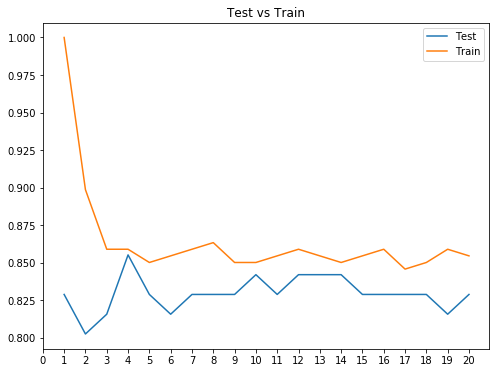

In [486]:
plt.figure(figsize = (8,6))
plt.plot(np.arange(1,21), mean_acc, label = 'Test')
plt.plot(np.arange(1,21), mean_acc_train, label = 'Train')
plt.title('Test vs Train')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.legend()

In [541]:
y_knn = model_fit(KNeighborsClassifier(n_neighbors = 13), X_train, y_train, X_test)
model_accuracy['KNN'] = accuracy(y_test, y_knn)

In [522]:
X = StandardScaler().fit(X).transform(X.astype(float))

In [523]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X , y, cv = 5)
scores

array([0.81967213, 0.8852459 , 0.85245902, 0.85      , 0.81666667])

In [524]:
scores.mean()

0.844808743169399

### SVMs

In [491]:
from sklearn import svm
clf2 = svm.SVC(C=1, kernel = 'rbf', gamma = 'auto')
clf2

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [542]:
y_svm = model_fit(clf2, X_train, y_train, X_test)
y2 = model_fit(clf2, X_train, y_train, X_train)
svm_acc = accuracy(y_test, y_svm)
svm2 = accuracy(y_train, y2)
model_accuracy['SVM'] = svm_acc
print('Train accuracy: ', svm2)
print('Test accuracy: ', svm_acc)

Train accuracy:  0.8634361233480177
Test accuracy:  0.8421052631578947


In [493]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf2, X , y, cv = 5)
scores

array([0.85245902, 0.86885246, 0.81967213, 0.83333333, 0.76666667])

In [494]:
scores.mean()

0.8281967213114754

### Decision Tree

In [495]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf3 = DecisionTreeClassifier(random_state=42,criterion = 'entropy', max_depth = 3)
clf3

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [496]:
y_tree = model_fit(clf3,X_train,y_train, X_test)
y_tree2 = model_fit(clf3,X_train,y_train, X_train)

In [497]:
print("Train score: ", accuracy(y_train,y_tree2)," Test score: ",accuracy(y_test,y_tree))

Train score:  0.8590308370044053  Test score:  0.8289473684210527


In [498]:
scores = cross_val_score(clf3, X , y, cv = 5)
scores

array([0.7704918 , 0.8852459 , 0.7704918 , 0.76666667, 0.75      ])

In [499]:
scores.mean()

0.7885792349726776

In [543]:
model_accuracy['Decision Tree'] = accuracy(y_test,y_tree)

### RFs

In [501]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(random_state = 42, max_depth = 4, criterion = 'entropy')
clf4

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [502]:
y_rf = model_fit(clf4,X_train,y_train, X_test)
y_rf2 = model_fit(clf4,X_train,y_train, X_train)
print("Train score: ", accuracy(y_train,y_rf2)," Test score: ",accuracy(y_test,y_rf))

Train score:  0.8590308370044053  Test score:  0.8552631578947368


C:\Users\aruni\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [503]:
scores = cross_val_score(clf4, X , y, cv = 5)
scores

array([0.81967213, 0.86885246, 0.81967213, 0.85      , 0.8       ])

In [504]:
scores.mean()

0.8316393442622951

In [544]:
model_accuracy['Random Forest'] = accuracy(y_test,y_rf)

### Logistic Regression

In [506]:
from sklearn.linear_model import LogisticRegression
clf5 = LogisticRegression(C = 0.1, solver = 'newton-cg')
clf5

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [507]:
y_lr = model_fit(clf5,X_train,y_train, X_test)
y_lr2 = model_fit(clf5,X_train,y_train, X_train)
print("Train score: ", accuracy(y_train,y_lr2)," Test score: ",accuracy(y_test,y_lr))

Train score:  0.8546255506607929  Test score:  0.8552631578947368


In [508]:
scores = cross_val_score(clf5, X , y, cv = 5)
scores

array([0.80327869, 0.90163934, 0.83606557, 0.85      , 0.8       ])

In [509]:
scores.mean()

0.8381967213114756

In [545]:
model_accuracy['Logistic Regression'] = accuracy(y_test,y_lr)

### Naive Bayes

In [511]:
from sklearn.naive_bayes import GaussianNB
clf6 = GaussianNB()
clf6

GaussianNB(priors=None, var_smoothing=1e-09)

In [512]:
y_nb = model_fit(clf6,X_train,y_train, X_test)
y_nb2 = model_fit(clf6,X_train,y_train, X_train)
print("Train score: ", accuracy(y_train,y_nb2)," Test score: ",accuracy(y_test,y_nb))

Train score:  0.8281938325991189  Test score:  0.8289473684210527


In [513]:
scores = cross_val_score(clf6, X , y, cv = 5)
scores

array([0.80327869, 0.67213115, 0.78688525, 0.81666667, 0.58333333])

In [565]:
scores.mean()

0.844808743169399

In [546]:
model_accuracy['Naive Bayes'] = accuracy(y_test,y_nb)

### XGBoost

In [516]:
from xgboost import XGBClassifier
clf7 = XGBClassifier(random_state=42, max_depth = 3, learning_rate = 0.01, n_estimators = 200)
clf7

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [517]:
y_xg = model_fit(clf7,X_train,y_train, X_test)
y_xg2 = model_fit(clf7,X_train,y_train, X_train)
print("Train score: ", accuracy(y_train,y_xg2)," Test score: ",accuracy(y_test,y_xg))

Train score:  0.8854625550660793  Test score:  0.8289473684210527


In [518]:
scores = cross_val_score(clf7, X , y, cv = 5)
scores

array([0.81967213, 0.8852459 , 0.78688525, 0.86666667, 0.76666667])

In [566]:
scores.mean()

0.844808743169399

In [547]:
model_accuracy['XGBoost'] = accuracy(y_test,y_xg)

## Comparing Models

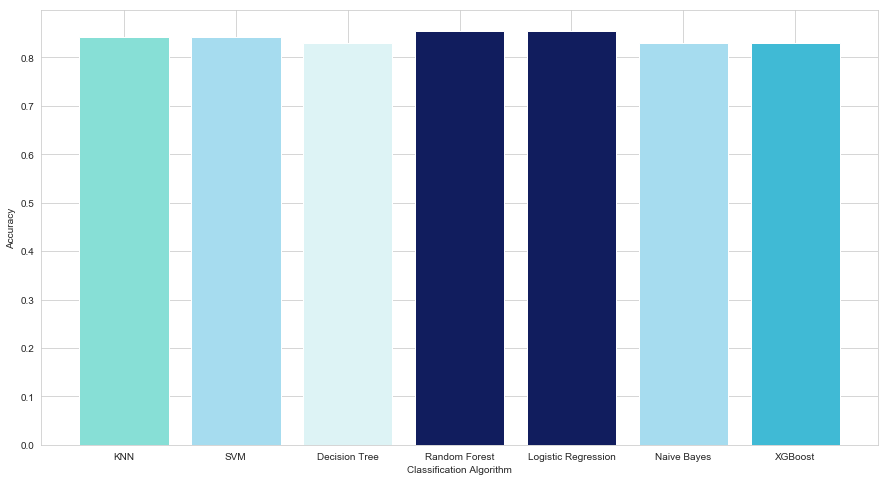

In [567]:
plt.figure(figsize=(15,8))
plt.bar(model_accuracy.keys(),model_accuracy.values(), color = ['#87dfd6','#a6dcef','#ddf3f5','#111d5e','#111d5e','#a6dcef','#40bad5'])
plt.ylabel("Accuracy")
plt.xlabel("Classification Algorithm")
plt.show()

We see that relatively all models perform well but we get the highest accuracy with <strong><em>Random Forest</em></strong> and <strong><em>Logistic Regression</em></strong> of around <strong>85.5%</strong>